# Predicting House Sale Prices

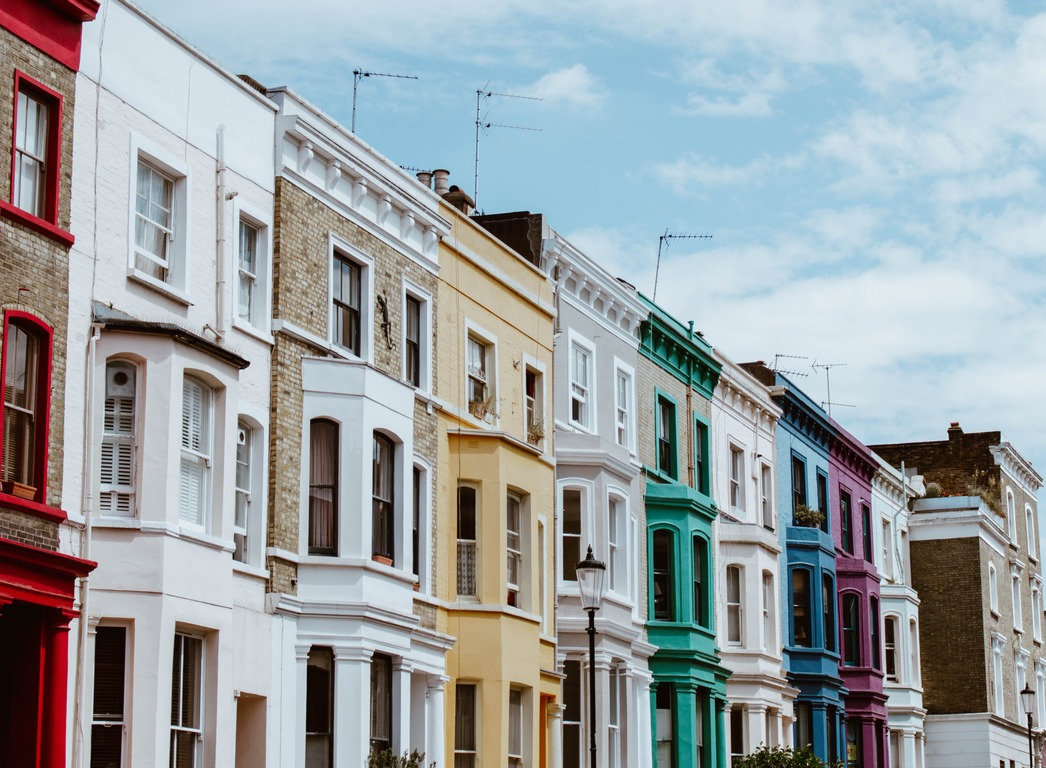

In this project, we'll work with housing data for the city of Ames, Iowa, the USA from 2006 to 2010 to predict house sale prices using a machine learning linear regression model. We can find more information about why the data was collected [here](https://www.tandfonline.com/doi/abs/10.1080/10691898.2011.11889627) and the column description [here](https://s3.amazonaws.com/dq-content/307/data_description.txt).
## Data Downloading and Initial Exploration

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

houses = pd.read_csv('AmesHousing.tsv', delimiter='\t')
pd.set_option('max_columns', houses.shape[1])
pd.set_option('display.max_rows', None)

missing_values = houses.isnull().sum()*100/len(houses)

print(f'\033[1mNumber of houses:\033[0m   {houses.shape[0]:,}\n'
      f'\033[1mNumber of features:\033[0m {houses.shape[1]}\n\n'
      f'\033[1mMissing values by column, in %:\033[0m\n'
      f'{missing_values[missing_values > 0].sort_values(ascending=False).round(2)}\n\n'
      f'\033[1mColumn names:\033[0m\n'
      f'{houses.columns}')
houses.head()

Number of houses:   2,930
Number of features: 82

Missing values by column, in %:
Pool QC           99.56
Misc Feature      96.38
Alley             93.24
Fence             80.48
Fireplace Qu      48.53
Lot Frontage      16.72
Garage Cond        5.43
Garage Qual        5.43
Garage Finish      5.43
Garage Yr Blt      5.43
Garage Type        5.36
Bsmt Exposure      2.83
BsmtFin Type 2     2.76
BsmtFin Type 1     2.73
Bsmt Qual          2.73
Bsmt Cond          2.73
Mas Vnr Area       0.78
Mas Vnr Type       0.78
Bsmt Half Bath     0.07
Bsmt Full Bath     0.07
Total Bsmt SF      0.03
Bsmt Unf SF        0.03
Garage Cars        0.03
Garage Area        0.03
BsmtFin SF 2       0.03
BsmtFin SF 1       0.03
Electrical         0.03
dtype: float64

Column names:
Index(['Order', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.0,TA,TA,CBlock,TA,Gd,Gd,BLQ,639.0,Unf,0.0,441.0,1080.0,GasA,Fa,Y,SBrkr,1656,0,0,1656,1.0,0.0,1,0,3,1,TA,7,Typ,2,Gd,Attchd,1960.0,Fin,2.0,528.0,TA,TA,P,210,62,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,BrkFace,None,0.0,Gd,TA,CBlock,TA,TA,No,ALQ,1065.0,Unf,0.0,1045.0,2110.0,GasA,Ex,Y,SBrkr,2110,0,0,2110,1.0,0.0,2,1,3,1,Ex,8,Typ,2,TA,Attchd,1968.0,Fin,2.0,522.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


## Feature Engineering
Using the information above and the [data documentation](https://s3.amazonaws.com/dq-content/307/data_description.txt), let's do some cleaning and wrangling of our data. To start with, we'll remove the columns with more than 5% of missing values. Here, the selected cut-off of 5% is tentative and can be played with in the future, to obtain a more precise model.

In [2]:
houses_transformed = houses.drop(missing_values[missing_values > 5].index, axis=1)

print(f'\033[1mNumber of remaining features:\033[0m {houses_transformed.shape[1]}\n\n'
      f'\033[1mThe remaining features with missing values (<= 5%):\033[0m\n'
      f'{missing_values[(missing_values <= 5)&(missing_values > 0)].sort_values(ascending=False).round(2)}')

Number of remaining features: 71

The remaining features with missing values (<= 5%):
Bsmt Exposure     2.83
BsmtFin Type 2    2.76
Bsmt Qual         2.73
Bsmt Cond         2.73
BsmtFin Type 1    2.73
Mas Vnr Type      0.78
Mas Vnr Area      0.78
Bsmt Full Bath    0.07
Bsmt Half Bath    0.07
BsmtFin SF 1      0.03
BsmtFin SF 2      0.03
Bsmt Unf SF       0.03
Total Bsmt SF     0.03
Electrical        0.03
Garage Cars       0.03
Garage Area       0.03
dtype: float64


For the remaining features with missing values (less or equal to 5%), let's fill in the missing values using the most frequent value from the corresponding feature:

In [3]:
houses_transformed = houses_transformed.fillna(houses_transformed.mode().to_dict(orient='records')[0])
print(f'\033[1mNumber of remaining features:\033[0m {houses_transformed.shape[1]}')

Number of remaining features: 71


The next step is to combine some of the available features to create new ones that better capture potentially important information. In particular, the features `Yr Sold`, `Year Remod/Add`, and `Year Built` are not so informative per se. What we can really need is knowing the number of years passed after each house was built and remodeled (if applicable). Let's create these features:

In [4]:
houses_transformed['years_after_built'] = houses_transformed['Yr Sold'] - houses_transformed['Year Built']
houses_transformed['years_after_remod'] = houses_transformed['Yr Sold'] - houses_transformed['Year Remod/Add']

print(f'\033[1mNumber of remaining features:\033[0m {houses_transformed.shape[1]:,}')
print(houses_transformed['years_after_built'].min())
print(houses_transformed['years_after_remod'].min())

Number of remaining features: 73
-1
-2


We have an issue here: some of the values of years are negative. Let's remove the rows with wrong data:

In [5]:
filtering = houses_transformed[(houses_transformed['years_after_remod'] < 0)|(houses_transformed['years_after_built'] < 0)]
houses_transformed = houses_transformed.drop(filtering.index, axis=0).reset_index(drop=True)

print(f'\033[1mNumber of remaining rows:\033[0m {houses_transformed.shape[0]:,}')

Number of remaining rows: 2,927


Only 3 rows had wrong values of years, and they were removed.

Now, let's remove the features that:
- aren't useful for machine learning (`Order`, `PID`),
- were already used for creating new columns (`Yr Sold`, `Year Built`, `Year Remod/Add`),
- leak information about the sale (`Mo Sold`, `Sale Type`, `Sale Condition`).

In [6]:
houses_transformed = houses_transformed.drop(['Order', 'PID', 
                                              'Yr Sold', 'Year Built', 'Year Remod/Add',
                                              'Mo Sold', 'Sale Type', 'Sale Condition'], axis=1)
print(f'\033[1mNumber of remaining features:\033[0m {houses_transformed.shape[1]:,}')

Number of remaining features: 65


Before proceeding with feature selection, let's gather all the steps of feature engineering into one function making it more flexible for a different choice of cut-off values. Also, we'll make this function more flexible for a potential input dataframe without some of the features present in the initial dataset `houses`:

In [7]:
def transform_features(df=houses, nan_cutoff=5):

    # Calculating missing values by column in % 
    missing_values = df.isnull().sum()*100/len(df)

    # Removing the features with the % of missing values higher than a selected cut-off
    if missing_values[missing_values > nan_cutoff].empty == False:
        df = df.drop(missing_values[missing_values > nan_cutoff].index, axis=1)

    # Filling the remaining missing values with the first mode value of the corresponding feature
    df = df.fillna(df.mode().to_dict(orient='records')[0])

    # Creating new features and dropping the wrong values from them
    if 'Yr Sold' in df:
        if 'Year Built' in df:
            df['years_after_built'] = df['Yr Sold'] - df['Year Built']
            df = df.drop(df[df['years_after_built'] < 0].index).reset_index(drop=True)
            df = df.drop(['Year Built'], axis=1)
        if 'Year Remod/Add' in df:
            df['years_after_remod'] = df['Yr Sold'] - df['Year Remod/Add']
            df = df.drop(df[df['years_after_remod'] < 0].index).reset_index(drop=True)
            df = df.drop(['Year Remod/Add'], axis=1)
        df = df.drop(['Yr Sold'], axis=1)

    # Dropping the unnecessary features or those leaking information about the sale
    for feature in ['Order', 'PID', 'Mo Sold', 'Yr Sold', 'Sale Type', 'Sale Condition']:
        if feature in df:
            df = df.drop(feature, axis=1)

    return df

## Feature Selection
Now, we're going to select the features that we'll use for further machine learning modeling.
### Categorical (nominal) features
For categorical features, we're going to use several selecting strategies, but first, let's isolate all text columns and display their current number and names:

In [8]:
text_features = houses_transformed.select_dtypes(exclude='number')
print(f'\033[1mNumber of text features:\033[0m {text_features.shape[1]}\n\n'
      f'{text_features.columns}')

Number of text features: 32

Index(['MS Zoning', 'Street', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl',
       'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Exter Qual',
       'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating', 'Heating QC',
       'Central Air', 'Electrical', 'Kitchen Qual', 'Functional',
       'Paved Drive'],
      dtype='object')


Not all the text features in our dataset are categorical, so we'll look up the data documentation to select the right ones. Also, we'll add the column `MS SubClass` that is currently numerical but is actually categorical because the numbers don't have any semantic meaning:

In [9]:
categorical_features = ['MS SubClass', 'MS Zoning', 'Street', 'Land Contour', 'Lot Config', 
                        'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type', 'House Style',
                        'Roof Style', 'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
                        'Foundation', 'BsmtFin Type 2', 'Heating', 'Central Air', 'Electrical']

Let's check the number of unique values in each categorical feature:

In [10]:
for feature in categorical_features:
    print(f'{feature}: \t{houses_transformed[feature].nunique()}')

MS SubClass: 	16
MS Zoning: 	7
Street: 	2
Land Contour: 	4
Lot Config: 	5
Neighborhood: 	28
Condition 1: 	9
Condition 2: 	8
Bldg Type: 	5
House Style: 	8
Roof Style: 	6
Roof Matl: 	8
Exterior 1st: 	16
Exterior 2nd: 	17
Mas Vnr Type: 	5
Foundation: 	6
BsmtFin Type 2: 	6
Heating: 	6
Central Air: 	2
Electrical: 	5


Let's filter out all the categorical features with more than 10 unique values (this cut-off can be played with):

In [11]:
more_than_10_categories = []
for feature in categorical_features:
    if houses_transformed[feature].nunique() > 10:
        more_than_10_categories.append(feature)

houses_transformed = houses_transformed.drop(more_than_10_categories, axis=1)

# Updating the list of categorical features
categorical_features = list(set(categorical_features) - set(more_than_10_categories))

print(f'\033[1mNumber of remaining categorical features:\033[0m {len(categorical_features)}\n\n'
      f'{(houses_transformed[categorical_features]).columns}')

Number of remaining categorical features: 16

Index(['Roof Matl', 'Street', 'Land Contour', 'Condition 2', 'Mas Vnr Type',
       'Foundation', 'Condition 1', 'Lot Config', 'Roof Style', 'Central Air',
       'MS Zoning', 'Heating', 'Electrical', 'Bldg Type', 'House Style',
       'BsmtFin Type 2'],
      dtype='object')


From the remaining categorical features, we have to exclude those that have low variability. As a threshold, let's use 95%, i.e., we'll eliminate the features where more than 95% of the values belong to a specific category. First, let's take a look at the frequency distribution of values by categorical feature, in %:

In [12]:
pd.options.display.float_format = '{:.0f}'.format

for feature in categorical_features:
    print(f'\033[1m{feature}\033[0m:\n{houses_transformed[feature].value_counts()*100/len(houses_transformed)}\n')

Roof Matl:
CompShg   99
Tar&Grv    1
WdShake    0
WdShngl    0
Membran    0
ClyTile    0
Roll       0
Metal      0
Name: Roof Matl, dtype: float64

Street:
Pave   100
Grvl     0
Name: Street, dtype: float64

Land Contour:
Lvl   90
HLS    4
Bnk    4
Low    2
Name: Land Contour, dtype: float64

Condition 2:
Norm     99
Feedr     0
Artery    0
PosA      0
PosN      0
RRNn      0
RRAe      0
RRAn      0
Name: Condition 2, dtype: float64

Mas Vnr Type:
None      61
BrkFace   30
Stone      8
BrkCmn     1
CBlock     0
Name: Mas Vnr Type, dtype: float64

Foundation:
PConc    45
CBlock   43
BrkTil   11
Slab      2
Stone     0
Wood      0
Name: Foundation, dtype: float64

Condition 1:
Norm     86
Feedr     6
Artery    3
RRAn      2
PosN      1
RRAe      1
PosA      1
RRNn      0
RRNe      0
Name: Condition 1, dtype: float64

Lot Config:
Inside    73
Corner    17
CulDSac    6
FR2        3
FR3        0
Name: Lot Config, dtype: float64

Roof Style:
Gable     79
Hip       19
Gambrel    1
Flat       

Hence, we'll remove the low-variable features:

In [13]:
dominated_categories = []
for feature in categorical_features:
    most_frequent_category = houses_transformed[feature].value_counts().mul(100).div(len(houses_transformed))[0]
    if most_frequent_category > 95:
        dominated_categories.append(feature)

houses_transformed = houses_transformed.drop(dominated_categories, axis=1)

# Updating the list of categorical features
categorical_features = list(set(categorical_features) - set(dominated_categories))

print(f'\033[1mNumber of remaining categorical features:\033[0m {len(categorical_features)}\n\n'
      f'{(houses_transformed[categorical_features]).columns}')

Number of remaining categorical features: 12

Index(['Lot Config', 'Roof Style', 'Central Air', 'Mas Vnr Type',
       'Land Contour', 'MS Zoning', 'Foundation', 'Electrical', 'Bldg Type',
       'House Style', 'Condition 1', 'BsmtFin Type 2'],
      dtype='object')


Finally, let's transform the remaining categorical features into a categorical data type and create dummy columns for them:

In [14]:
for feature in categorical_features:
    houses_transformed[feature] = houses_transformed[feature].astype('category')

# Creating dummy columns for the remaining categorical features
houses_transformed = pd.concat([houses_transformed, 
                                pd.get_dummies(houses_transformed.select_dtypes('category'))], axis=1)\
                       .drop(categorical_features, axis=1)

print(f'\033[1mNumber of all the features:\033[0m {houses_transformed.shape[1]}')

Number of all the features: 113


### Ordinal features
There are 2 ordinal features in our dataset that are already encoded as numeric from 1 ("Very poor") to 10 ("Very Excellent"): `Overall Qual` and `Overall Cond`. Let's take a look at the other ordinal features:

In [15]:
ordinal_features = ['Lot Shape', 'Utilities', 'Land Slope', 'Exter Qual', 'Exter Cond', 
                    'Bsmt Cond', 'Bsmt Exposure', 'Heating QC', 'BsmtFin Type 1', 'Kitchen Qual',
                    'Functional', 'Paved Drive']

for feature in ordinal_features:
    print(f'{feature}:\t{houses_transformed[feature].unique()}')

Lot Shape:	['IR1' 'Reg' 'IR2' 'IR3']
Utilities:	['AllPub' 'NoSewr' 'NoSeWa']
Land Slope:	['Gtl' 'Mod' 'Sev']
Exter Qual:	['TA' 'Gd' 'Ex' 'Fa']
Exter Cond:	['TA' 'Gd' 'Fa' 'Po' 'Ex']
Bsmt Cond:	['Gd' 'TA' 'Po' 'Fa' 'Ex']
Bsmt Exposure:	['Gd' 'No' 'Mn' 'Av']
Heating QC:	['Fa' 'TA' 'Ex' 'Gd' 'Po']
BsmtFin Type 1:	['BLQ' 'Rec' 'ALQ' 'GLQ' 'Unf' 'LwQ']
Kitchen Qual:	['TA' 'Gd' 'Ex' 'Fa' 'Po']
Functional:	['Typ' 'Mod' 'Min1' 'Min2' 'Maj1' 'Maj2' 'Sev' 'Sal']
Paved Drive:	['P' 'Y' 'N']


Consulting the [data documentation](https://s3.amazonaws.com/dq-content/307/data_description.txt), we'll map them into numeric:

In [16]:
feature_mapping = {'Lot Shape': {'Reg': 4, 'IR1': 3, 'IR2': 2, 'IR3': 1},
                   'Utilities': {'AllPub': 3, 'NoSewr': 2, 'NoSeWa': 1},
                   'Land Slope': {'Gtl': 3, 'Mod': 2, 'Sev': 1},
                   'Bsmt Exposure': {'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1},
                   'BsmtFin Type 1': {'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1},
                   'Functional': {'Typ': 8, 'Min1': 7, 'Min2': 6, 'Mod': 5, 'Maj1': 4, 'Maj2': 3, 'Sev': 2, 'Sal': 1},
                   'Paved Drive':  {'Y': 3, 'P': 2, 'N': 1}}

for k in feature_mapping:
    houses_transformed[k] = houses_transformed[k].map(feature_mapping[k])

other_feature_mapping = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1}

for feature in ['Exter Qual', 'Exter Cond', 'Heating QC', 'Kitchen Qual', 'Bsmt Qual', 'Bsmt Cond']:
    houses_transformed[feature] = houses_transformed[feature].map(other_feature_mapping)

# Checking the results
for feature in ordinal_features:
    print(f'{feature}:\t{sorted(houses_transformed[feature].unique())}')

pd.options.display.float_format = '{:.2f}'.format
pd.set_option('max_columns', houses_transformed.shape[1])
houses_transformed.head()

Lot Shape:	[1, 2, 3, 4]
Utilities:	[1, 2, 3]
Land Slope:	[1, 2, 3]
Exter Qual:	[2, 3, 4, 5]
Exter Cond:	[1, 2, 3, 4, 5]
Bsmt Cond:	[1, 2, 3, 4, 5]
Bsmt Exposure:	[1, 2, 3, 4]
Heating QC:	[1, 2, 3, 4, 5]
BsmtFin Type 1:	[1, 2, 3, 4, 5, 6]
Kitchen Qual:	[1, 2, 3, 4, 5]
Functional:	[1, 2, 3, 4, 5, 6, 7, 8]
Paved Drive:	[1, 2, 3]


,Lot Area,Lot Shape,Utilities,Land Slope,Overall Qual,Overall Cond,Mas Vnr Area,Exter Qual,Exter Cond,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating QC,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Garage Cars,Garage Area,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,SalePrice,years_after_built,years_after_remod,MS Zoning_A (agr),MS Zoning_C (all),MS Zoning_FV,MS Zoning_I (all),MS Zoning_RH,MS Zoning_RL,MS Zoning_RM,Land Contour_Bnk,Land Contour_HLS,Land Contour_Low,Land Contour_Lvl,Lot Config_Corner,Lot Config_CulDSac,Lot Config_FR2,Lot Config_FR3,Lot Config_Inside,Condition 1_Artery,Condition 1_Feedr,Condition 1_Norm,Condition 1_PosA,Condition 1_PosN,Condition 1_RRAe,Condition 1_RRAn,Condition 1_RRNe,Condition 1_RRNn,Bldg Type_1Fam,Bldg Type_2fmCon,Bldg Type_Duplex,Bldg Type_Twnhs,Bldg Type_TwnhsE,House Style_1.5Fin,House Style_1.5Unf,House Style_1Story,House Style_2.5Fin,House Style_2.5Unf,House Style_2Story,House Style_SFoyer,House Style_SLvl,Roof Style_Flat,Roof Style_Gable,Roof Style_Gambrel,Roof Style_Hip,Roof Style_Mansard,Roof Style_Shed,Mas Vnr Type_BrkCmn,Mas Vnr Type_BrkFace,Mas Vnr Type_CBlock,Mas Vnr Type_None,Mas Vnr Type_Stone,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtFin Type 2_ALQ,BsmtFin Type 2_BLQ,BsmtFin Type 2_GLQ,BsmtFin Type 2_LwQ,BsmtFin Type 2_Rec,BsmtFin Type 2_Unf,Central Air_N,Central Air_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr
0,31770,3,3,3,6,5,112.00,3,3,3,4,4,4,639.00,0.00,441.00,1080.00,2,1656,0,0,1656,1.00,0.00,1,0,3,1,3,7,8,2,2.00,528.00,2,210,62,0,0,0,0,0,215000,50,50,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1
1,11622,4,3,3,5,6,0.00,3,3,3,3,1,3,468.00,144.00,270.00,882.00,3,896,0,0,896,0.00,0.00,1,0,2,1,3,5,8,0,1.00,730.00,3,140,0,0,0,120,0,0,105000,49,49,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1
2,14267,3,3,3,6,6,108.00,3,3,3,3,1,5,923.00,0.00,406.00,1329.00,3,1329,0,0,1329,0.00,0.00,1,1,3,1,4,6,8,0,1.00,312.00,3,393,36,0,0,0,0,12500,172000,52,52,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1
3,11160,4,3,3,7,5,0.00,4,3,3,3,1,5,1065.00,0.00,1045.00,2110.00,5,2110,0,0,2110,1.00,0.00,2,1,3,1,5,8,8,2,2.00,522.00,3,0,0,0,0,0,0,0,244000,42,42,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1
4,13830,3,3,3,5,5,0.00,3,3,4,3,1,6,791.00,0.00,137.00,928.00,4,928,701,0,1629,0.00,0.00,2,1,3,1,3,6,8,1,2.00,482.00,3,212,34,0,0,0,0,0,189900,13,12,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1


Now we have all the features in a numerical format meaning that, technically, the data is already ready to be modeled. Hence, before proceeding with feature selection, let's try to apply the linear regression modeling algorithm to predict house prices based on the already existing 113 features. For this purpose, we'll create a function that takes in an optional parameter `k`, with a default value of 0, and performs the following calculations accordingly:
- `k = 0` – holdout validation,
- `k = 1` – simple cross-validation,
- `k > 1` – k-fold cross-validation.

The function, for now, will return the RMSE value/-s.

In [17]:
def train_and_test(df, k=0, rand_state=1):

    lr = LinearRegression()

    features = df.columns.drop('SalePrice')

    X = df[features]
    y = df['SalePrice']

    if k <= 1:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, 
                                                            random_state=rand_state)

        # Performing holdout validation
        if k == 0:
            lr.fit(X_train, y_train)
            predictions = lr.predict(X_test)
            rmse = np.sqrt(mean_squared_error(y_test, predictions))
            print(f'RMSE: {rmse:.2f}')
            return ''

        # Performing simple cross-validation
        else:
            lr.fit(X_train, y_train)
            predictions_1 = lr.predict(X_test)
            rmse_1 = np.sqrt(mean_squared_error(y_test, predictions_1))

            lr.fit(X_test, y_test)
            predictions_2 = lr.predict(X_train)
            rmse_2 = np.sqrt(mean_squared_error(y_train, predictions_2))
            print(f'RMSE 1: {rmse_1:.2f}, RMSE 2: {rmse_2:.2f}')
            rmse = np.mean([rmse_1, rmse_2])
            print(f'RMSE: {rmse:.2f}')
            return ''

    # Performing k-fold cross-validation
    else:
        kf = KFold(n_splits=k, shuffle=True, random_state=rand_state)
        rmse_values = []
        predicted_prices_lst = []
        for train_index, test_index in kf.split(X):
            X_train, X_test = X.iloc[train_index, :], X.iloc[test_index, :]
            y_train, y_test = y[train_index], y[test_index]
            lr.fit(X_train, y_train)
            predictions = lr.predict(X_test)
            mse = mean_squared_error(y_test, predictions)
            rmse = np.sqrt(mse)
            rmse_values.append(round(rmse, 2))
        print(f'RMSE values: {rmse_values}')
        rmse = np.mean(rmse_values)
        print(f'RMSE: {rmse:.2f}')
        return ''

print(train_and_test(houses_transformed), '\n--------------')
print(train_and_test(houses_transformed, k=1), '\n--------------')
print(train_and_test(houses_transformed, k=5))

RMSE: 31457.90
 
--------------
RMSE 1: 31457.90, RMSE 2: 26904.81
RMSE: 29181.35
 
--------------
RMSE values: [39041.92, 25046.36, 25627.78, 24579.95, 27441.94]
RMSE: 28347.59



The obtained RMSE values are 31,457.90 (`k = 0`), 29,181.35 (`k = 1`), and 28,347.59 (`k = 5`).

Later, when we complete the feature selection process, we'll compare these values with the new results.
### Numerical features
Let's return to feature selection. Since now all the features are numerical, we can find those that strongly correlate with our target feature `SalePrice`:

In [18]:
corr_price = houses_transformed.corr()['SalePrice'].abs().sort_values(ascending=False).drop('SalePrice')
print(f'\033[1mFeature correlation coefficients with "SalePrice"\033[0m\n{corr_price}')

Feature correlation coefficients with "SalePrice"
Overall Qual           0.80
Gr Liv Area            0.72
Exter Qual             0.70
Bsmt Qual              0.68
Kitchen Qual           0.67
Garage Cars            0.65
Total Bsmt SF          0.64
Garage Area            0.64
1st Flr SF             0.64
years_after_built      0.56
Full Bath              0.55
years_after_remod      0.53
Foundation_PConc       0.52
Mas Vnr Area           0.51
TotRms AbvGrd          0.50
Fireplaces             0.47
Heating QC             0.45
BsmtFin SF 1           0.44
Bsmt Exposure          0.40
Mas Vnr Type_None      0.40
Foundation_CBlock      0.35
Wood Deck SF           0.33
Open Porch SF          0.32
Mas Vnr Type_Stone     0.31
MS Zoning_RM           0.29
Lot Shape              0.29
Half Bath              0.28
Roof Style_Hip         0.28
Bsmt Full Bath         0.28
Paved Drive            0.28
BsmtFin Type 1         0.27
2nd Flr SF             0.27
Lot Area               0.27
Central Air_Y          0.2

Let's keep only the features with a correlation coefficient higher or equal to 0.3. Again, this cut-off is tentative and can be reconsidered for the sake of testing different models.

In [19]:
houses_transformed = houses_transformed.drop(corr_price[corr_price < 0.3].index, axis=1)
print(f'\033[1mNumber of remaining features:\033[0m {houses_transformed.shape[1]}')

Number of remaining features: 25


Among the remaining features, we have to detect those (if any) that strongly correlate with one or several other features and keep only one feature of each group to avoid model distortion. As a threshold, let's consider a correlation coefficient of 0.7 (another tentative value for a potential further adjustment). Hence, we'll focus on the features that have a correlation coefficient with any other feature higher than 0.7 and lower than 1 (the second condition will filter out the feature correlation with themselves):

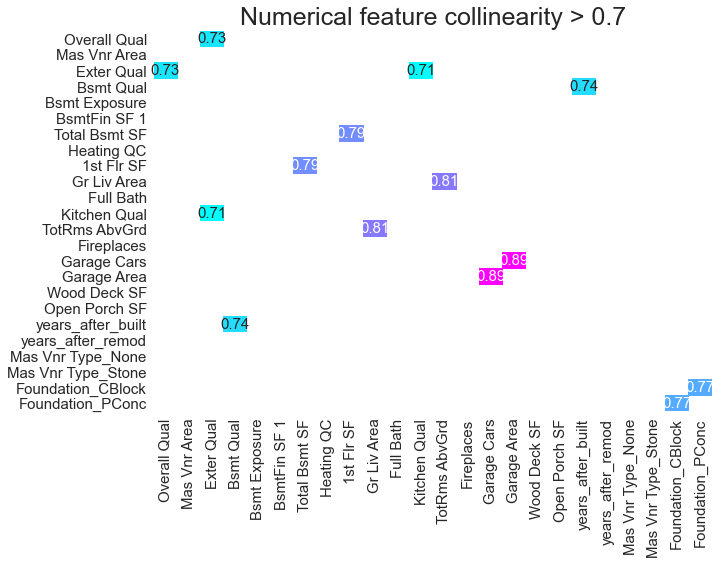

In [20]:
corr_features = houses_transformed.corr().abs().drop('SalePrice').drop('SalePrice', axis=1)
corr_features_higher_07 = corr_features[(corr_features > 0.7) & (corr_features < 1)]

sns.set_style('white')
plt.figure(figsize=(10, 7))
sns.heatmap(corr_features_higher_07, cmap='cool',
            annot=True, annot_kws={'size': 15}, fmt='.2f', 
            cbar=False)
plt.title('Numerical feature collinearity > 0.7', fontsize=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

We have 7 pairs of highly correlated features. Let's display them in a more digestible form:

In [21]:
# Constructing a table of the strongly collinear features
corr_matrix = houses_transformed.corr().abs().drop('SalePrice').drop('SalePrice', axis=1)
all_pairs = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
                       .stack()
                       .sort_values(ascending=False))
collinear_pairs = all_pairs[all_pairs > 0.7].to_frame().reset_index()
collinear_pairs.columns = ['Feature_1', 'Feature_2', 'Coeff']
collinear_pairs

,Feature_1,Feature_2,Coeff
0,Garage Cars,Garage Area,0.89
1,Gr Liv Area,TotRms AbvGrd,0.81
2,Total Bsmt SF,1st Flr SF,0.79
3,Foundation_CBlock,Foundation_PConc,0.77
4,Bsmt Qual,years_after_built,0.74
5,Overall Qual,Exter Qual,0.73
6,Exter Qual,Kitchen Qual,0.71


From the plot and the table above, it seems that there is a feature that is stongly collinear with 2 other features:

In [22]:
intersect = list(set(collinear_pairs['Feature_1']) & set(collinear_pairs['Feature_2']))
intersect

['Exter Qual']

Let's drop it from our dataframe:

In [23]:
houses_transformed = houses_transformed.drop(intersect, axis=1)
print(f'\033[1mNumber of remaining features:\033[0m {houses_transformed.shape[1]}')

Number of remaining features: 24


Now, we'll update the table above and eliminate from each pair the feature that correlates less with the `SalePrice` target variable:

In [24]:
# Reconstructing the table of the strongly collinear features
corr_matrix = houses_transformed.corr().abs().drop('SalePrice').drop('SalePrice', axis=1)
all_pairs = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
                       .stack()
                       .sort_values(ascending=False))
collinear_pairs = all_pairs[all_pairs > 0.7].to_frame().reset_index()
collinear_pairs.columns = ['Feature_1', 'Feature_2', 'Coeff']
print(collinear_pairs)

# Comparing the correlation coefficients of the collinear features with 'SalePrice'
# and eliminating from each pair the feature with the lowest one
for index, row in collinear_pairs.iterrows():
    feature_1 = row['Feature_1']
    feature_2 = row['Feature_2']
    feature_1_coef = corr_price[feature_1]
    feature_2_coef = corr_price[feature_2]
    if feature_1_coef > feature_2_coef:
        houses_transformed = houses_transformed.drop(feature_2, axis=1)
    else:
        houses_transformed = houses_transformed.drop(feature_1, axis=1)

print(f'\n\n\033[1mNumber of remaining features:\033[0m {houses_transformed.shape[1]}\n\n'
      f'{houses_transformed.columns}')

           Feature_1          Feature_2  Coeff
0        Garage Cars        Garage Area   0.89
1        Gr Liv Area      TotRms AbvGrd   0.81
2      Total Bsmt SF         1st Flr SF   0.79
3  Foundation_CBlock   Foundation_PConc   0.77
4          Bsmt Qual  years_after_built   0.74


Number of remaining features: 19

Index(['Overall Qual', 'Mas Vnr Area', 'Bsmt Qual', 'Bsmt Exposure',
       'BsmtFin SF 1', 'Total Bsmt SF', 'Heating QC', 'Gr Liv Area',
       'Full Bath', 'Kitchen Qual', 'Fireplaces', 'Garage Cars',
       'Wood Deck SF', 'Open Porch SF', 'SalePrice', 'years_after_remod',
       'Mas Vnr Type_None', 'Mas Vnr Type_Stone', 'Foundation_PConc'],
      dtype='object')


Let's upate the `corr_price` variable and check the relationships of the remaining features with the sale price graphically: 

Feature correlation coefficients with "SalePrice"
Overall Qual         0.80
Gr Liv Area          0.72
Bsmt Qual            0.68
Kitchen Qual         0.67
Garage Cars          0.65
Total Bsmt SF        0.64
Full Bath            0.55
years_after_remod    0.53
Foundation_PConc     0.52
Mas Vnr Area         0.51
Fireplaces           0.47
Heating QC           0.45
BsmtFin SF 1         0.44
Bsmt Exposure        0.40
Mas Vnr Type_None    0.40
Wood Deck SF         0.33
Open Porch SF        0.32
Mas Vnr Type_Stone   0.31
Name: SalePrice, dtype: float64



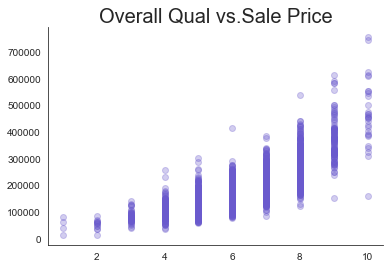

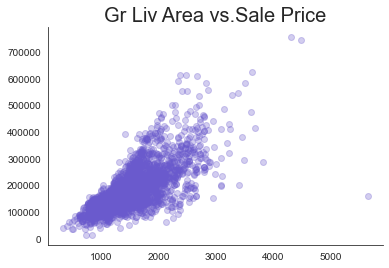

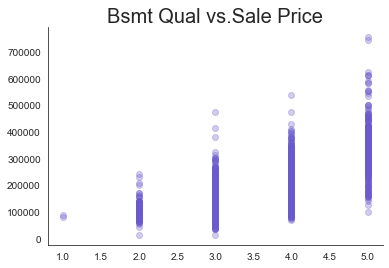

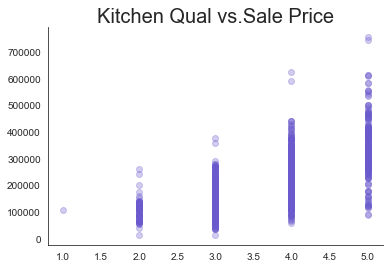

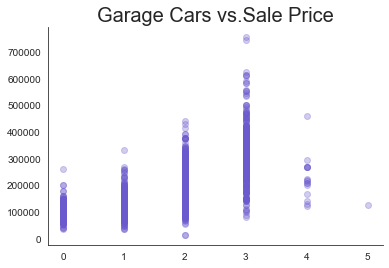

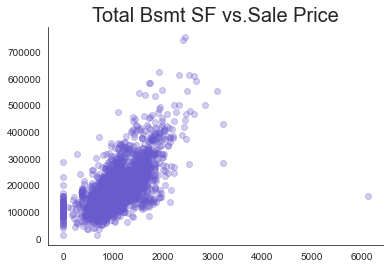

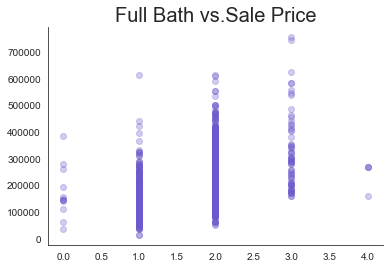

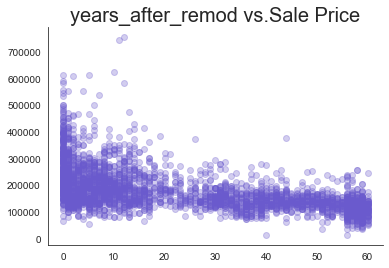

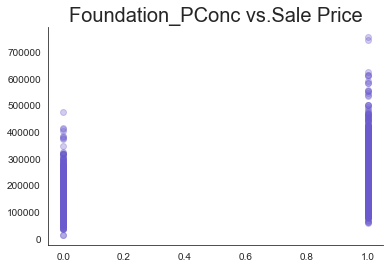

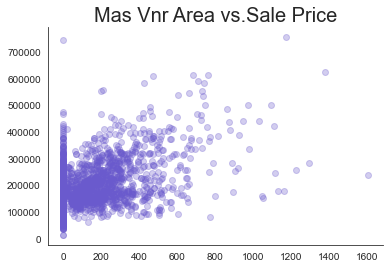

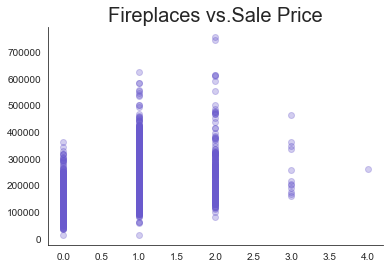

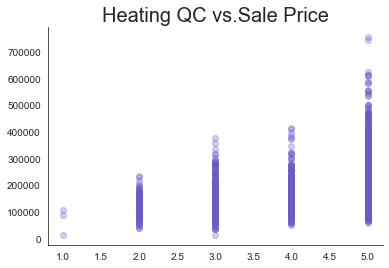

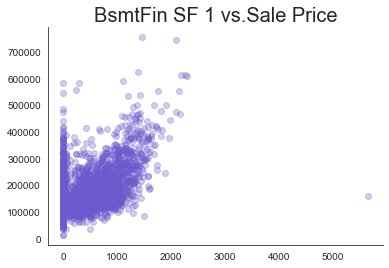

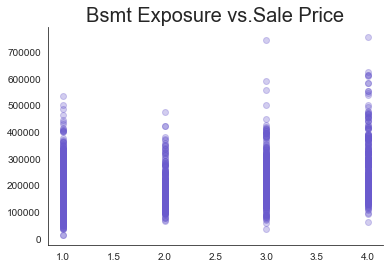

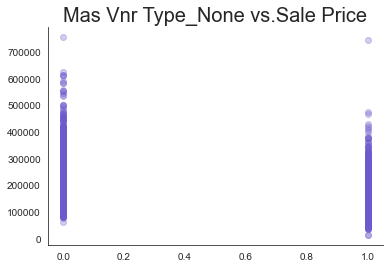

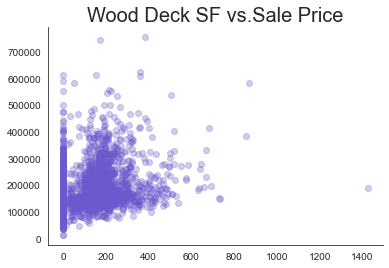

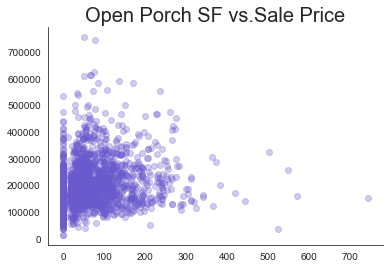

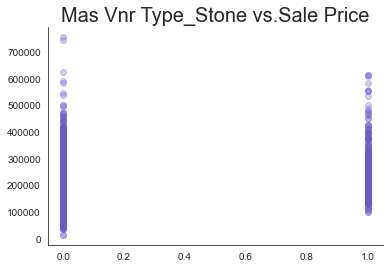

In [25]:
corr_price = houses_transformed.corr()['SalePrice'].abs().sort_values(ascending=False).drop('SalePrice')
print(f'\033[1mFeature correlation coefficients with "SalePrice"\033[0m\n{corr_price}\n')

for feature in corr_price.index:
    if feature in houses_transformed:
        plt.figure()
        plt.scatter(houses_transformed[feature], houses_transformed['SalePrice'], 
                    color='slateblue', alpha=0.3)
        plt.title(f'{feature} vs.Sale Price', fontsize=20)
        sns.despine()

The majority of the continuous features above have obvious upper outliers:

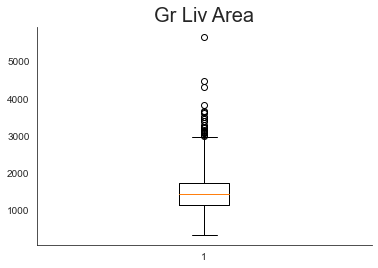

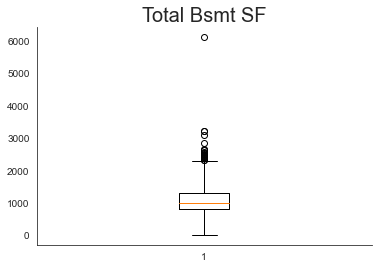

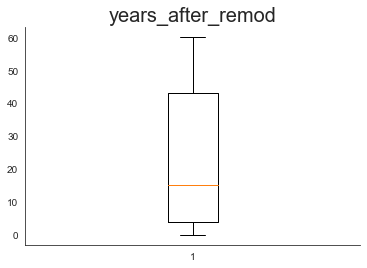

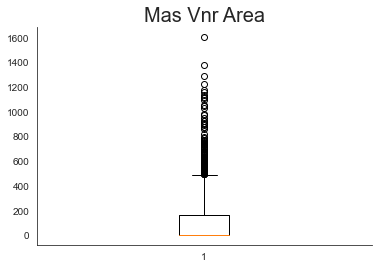

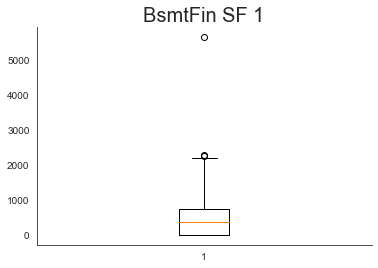

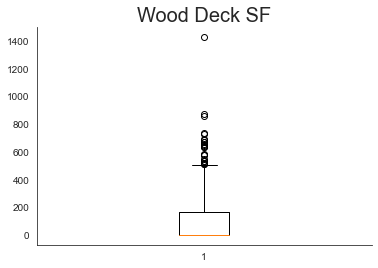

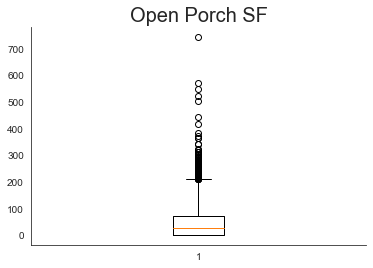

In [26]:
for feature in corr_price.index:
    if feature in houses_transformed and houses_transformed[feature].nunique() > 10:
        plt.figure()
        plt.boxplot(houses_transformed[feature], whis=2)
        plt.title(f'{feature}', fontsize=20)
        sns.despine()

Let's remove those outliers and recalculate the number of the remaining rows.

*Side note:* here and above (for creating the boxplots) we used the whisker coefficient value of 2, instead of the "traditional" 1.5. We selected such a conservative value by using a trial-and-error approach, since the lower values, given too many outliers, resulted in removing up to 18% of all the rows.

In [27]:
print(f'\033[1mNumber of rows before removing the outliers:\033[0m {houses_transformed.shape[0]}')

for feature in ['Gr Liv Area', 'Total Bsmt SF', 'Mas Vnr Area', 'BsmtFin SF 1', 'Wood Deck SF', 'Open Porch SF']:
    if feature in houses_transformed:
        Q1 = houses_transformed[feature].quantile(0.25)
        Q3 = houses_transformed[feature].quantile(0.75)
        IQR = Q3 - Q1
        houses_transformed=houses_transformed.drop(houses_transformed[houses_transformed[feature] > (Q3 + 2 * IQR)].index)
houses_transformed = houses_transformed.reset_index(drop=True)

print(f'\033[1mNumber of rows after removing the outliers:\033[0m  {houses_transformed.shape[0]}')

Number of rows before removing the outliers: 2927
Number of rows after removing the outliers:  2646


Hence, we removed 281 rows (9.6% of all the rows). Let's check how the corresponding plots have changed:

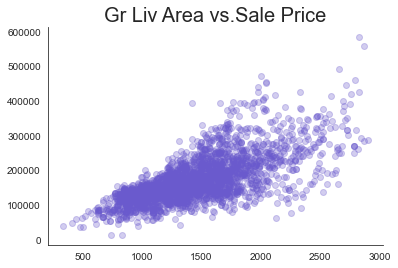

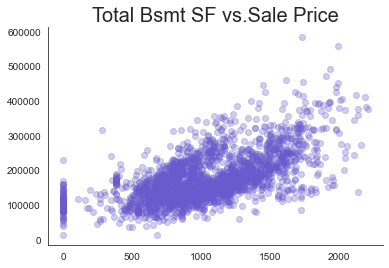

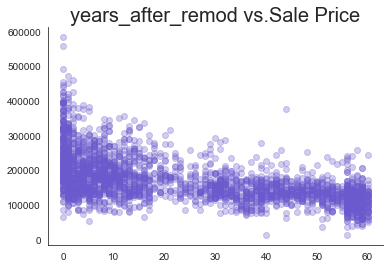

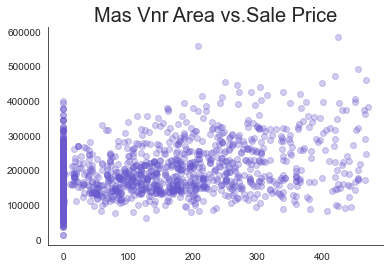

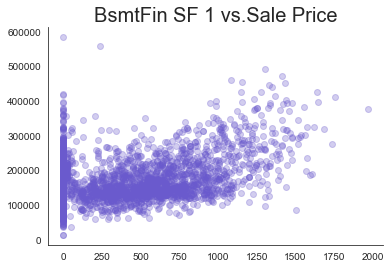

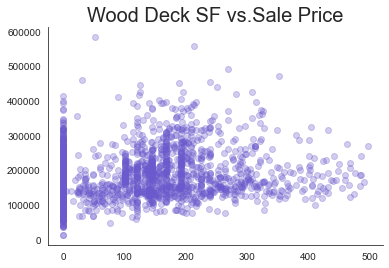

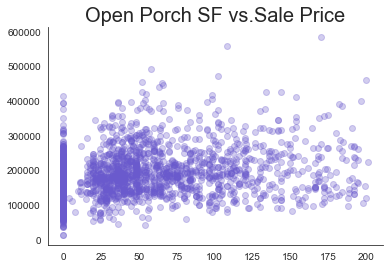

In [28]:
for feature in corr_price.index:
    if feature in houses_transformed and houses_transformed[feature].nunique() > 10:
        plt.figure()
        plt.scatter(houses_transformed[feature], houses_transformed['SalePrice'], 
                    color='slateblue', alpha=0.3)
        plt.title(f'{feature} vs.Sale Price', fontsize=20)
        sns.despine()

Now, we'll unite all the steps of feature selection in one function introducing some parameters for possible cut-off values. Also, we'll introduce a new parameter `initial` meaning whether the input dataframe is going to be used for model training and testing (`initial=True`) or for real predicting prices on some new unlabeled data (`initial=False`). In the second case, for example, we're not going to check the feature variance, unique values, etc., just to prepare the data properly to be used in a predictive model:

In [29]:
def select_features(df, 
                    initial=True, 
                    unique_cats_cutoff=10,
                    domin_cat_cutoff=95,
                    corr_price_cutoff=0.3, 
                    collinear_cutoff=0.7,
                    whisker_coef=2):

    # Isolating categorical features according to the documentation
    categorical_features_doc = ['MS SubClass', 'MS Zoning', 'Street', 'Alley', 'Land Contour',
                                'Lot Config', 'Neighborhood', 'Condition 1', 'Condition 2',
                                'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl',
                                'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Foundation', 
                                'BsmtFin Type 2', 'Heating', 'Central Air', 'Electrical',
                                'Garage Type', 'Fence', 'Misc Feature']

    # Creating a cleaned list of categorical features
    categorical_features = [feature for feature in categorical_features_doc if feature in df]

    if initial:

        # Creating a list of categorical features with the number of unique categories higher 
        # than a selected cut-off
        more_than_n_categories = [feature for feature in categorical_features if df[feature].nunique() > unique_cats_cutoff]

        # Dropping such features from the dataframe
        if len(more_than_n_categories) > 0:
            df = df.drop(more_than_n_categories, axis=1)

        # Updating the list of categorical features
        categorical_features = list(set(categorical_features) - set(more_than_n_categories))

        # Creating a list of categorical features with a low variance
        dominated_categories = []
        for feature in categorical_features:
            most_frequent_category = df[feature].value_counts().mul(100).div(len(df))[0]
            if most_frequent_category > domin_cat_cutoff:
                dominated_categories.append(feature)

        # Dropping such features from the dataframe
        if len(more_than_n_categories) > 0:
            df = df.drop(dominated_categories, axis=1)

        # Updating the list of categorical features
        categorical_features = list(set(categorical_features) - set(dominated_categories))

    # Mapping the remaining categorical features into the 'category' dtype
    for feature in categorical_features:
        df[feature] = df[feature].astype('category')

    # Creating dummy columns for the remaining categorical features
    df = pd.concat([df, pd.get_dummies(df.select_dtypes('category'))], axis=1).drop(categorical_features, axis=1)

    # Isolating ordinal features according to the documentation
    # (except for 'Overall Qual' and 'Overall Cond' already mapped into a numerical format)
    ordinal_features = ['Lot Shape', 'Utilities', 'Land Slope', 'Exter Qual', 'Exter Cond',
                        'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'Heating QC',
                        'Kitchen Qual', 'Functional', 'Fireplace Qu', 'Garage Finish',
                        'Garage Qual', 'Garage Cond', 'Paved Drive', 'Pool QC']

    # Creating the dictionaries for further ordinal feature mapping
    feature_mapping = {'Lot Shape': {'Reg': 4, 'IR1': 3, 'IR2': 2, 'IR3': 1},
                       'Utilities': {'AllPub': 3, 'NoSewr': 2, 'NoSeWa': 1},
                       'Land Slope': {'Gtl': 3, 'Mod': 2, 'Sev': 1},
                       'Garage Finish': {'Fin': 3, 'RFn': 2, 'Unf': 1},
                       'Bsmt Exposure': {'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1},
                       'BsmtFin Type 1': {'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1},
                       'Functional': {'Typ': 8, 'Min1': 7, 'Min2': 6, 'Mod': 5, 'Maj1': 4, 'Maj2': 3, 'Sev': 2, 'Sal': 1},
                       'Paved Drive': {'Y': 3, 'P': 2, 'N': 1}}
    other_feature_mapping = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1}

    # Mapping ordinal features into a numerical format
    for k in feature_mapping:
        if k in df:
            df[k] = df[k].map(feature_mapping[k]) 
    for feature in ['Exter Qual', 'Exter Cond', 'Heating QC', 'Kitchen Qual', 'Bsmt Cond', 
                    'Bsmt Qual', 'Fireplace Qu', 'Garage Qual', 'Garage Cond', 'Pool QC']:
        if feature in df:
            df[feature] = df[feature].map(other_feature_mapping)

    if initial:

        # Calculating correlation coefficients with price and sorting by abslute value
        corr_price = df.corr()['SalePrice'].abs().sort_values(ascending=False).drop('SalePrice')

        # Dropping all the features with the price correlation coefficient lower 
        # than a selected cut-off
        df = df.drop(corr_price[corr_price < corr_price_cutoff].index, axis=1)

        # Calculating correlation coefficients between features
        corr_features = df.corr().abs().drop('SalePrice').drop('SalePrice', axis=1)

        # Selecting features with the correlation coefficients with other features higher 
        # than a selected cut-off
        def select_collinear_features():
            corr_matrix = df.corr().abs().drop('SalePrice').drop('SalePrice', axis=1)
            all_pairs = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
                                    .stack()
                                    .sort_values(ascending=False))
            collinear_pairs = all_pairs[all_pairs > collinear_cutoff].to_frame().reset_index()
            collinear_pairs.columns = ['Feature_1', 'Feature_2', 'Coeff']
            return collinear_pairs

        collinear_pairs = select_collinear_features()

        # Dropping the features collinear with more than one feature
        intersect = list(set(collinear_pairs['Feature_1']) & set(collinear_pairs['Feature_2']))
        df = df.drop(intersect, axis=1)

        # Re-selecting features with the correlation coefficients with other features higher 
        # than a selected cut-off
        collinear_pairs = select_collinear_features()

        # Comparing the correlation coefficients of the collinear features with 'SalePrice'
        # and eliminating from each pair the feature with the lowest one
        for index, row in collinear_pairs.iterrows():
            feature_1 = row['Feature_1']
            feature_2 = row['Feature_2']
            feature_1_coef = corr_price[feature_1]
            feature_2_coef = corr_price[feature_2]
            if feature_1_coef > feature_2_coef:
                df = df.drop(feature_2, axis=1)
            else:
                df = df.drop(feature_1, axis=1) 

        # Recalculating the correlation coefficients with price and sorting them by abslute value
        corr_price = df.corr()['SalePrice'].abs().sort_values(ascending=False).drop('SalePrice')

        # Removing upper outliers
        for feature in ['Gr Liv Area', 'Total Bsmt SF', 'Mas Vnr Area', 'BsmtFin SF 1', 'Wood Deck SF', 'Open Porch SF']:
            if feature in df:
                Q1 = df[feature].quantile(0.25)
                Q3 = df[feature].quantile(0.75)
                IQR = Q3 - Q1
                df = df.drop(df[df[feature] > (Q3 + whisker_coef * IQR)].index)
        df = df.reset_index(drop=True)

    # Removing the 'SalePrice' column (if any) from the data to be predicted (if applicable)
    if not initial:
        if 'SalePrice' in df:
            df = df.drop('SalePrice', axis=1)
    return df

## Train and Test
Now that we cleaned the features and selected the most relevant ones, let's update the function `train_and_test()` that we created earlier. This time, it will return both the RMSE value/-s and the predictions of prices of a new unlabeled data (when `df_to_predict` is provided). Before that, we'll create an auxiliary function `provide_uniform_columns()` that will provide uniform columns for the data to be fit into the model and the real unlabeled data to be predicted (if applicable):

In [30]:
def provide_uniform_columns(unlabeled_data, train_data):
    for feature in unlabeled_data:
        if feature not in train_data:
            unlabeled_data = unlabeled_data.drop(feature, axis=1)

        unlabeled_data_updated = train_data.iloc[:len(unlabeled_data)].reset_index(drop=True)
        for feature in unlabeled_data_updated:
            if feature in unlabeled_data:
                unlabeled_data_updated[feature] = unlabeled_data[feature]
            else:
                unlabeled_data_updated[feature] = 0
    return unlabeled_data_updated

def train_and_test(df, 
                   df_to_predict=pd.DataFrame([]), 
                   k=0, 
                   rand_state=1):

    lr = LinearRegression()

    features = df.columns.drop('SalePrice')

    X = df[features]
    y = df['SalePrice']

    if k <= 1:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, 
                                                            random_state=rand_state)

        # Providing uniform columns for the data to be fit into the model 
        # and the real unlabeled data (if applicable) to be predicted
        if df_to_predict.shape != (0, 0):
            df_to_predict_updated = provide_uniform_columns(df_to_predict, X_train)

        # Performing holdout validation
        if k == 0:
            lr.fit(X_train, y_train)
            predictions = lr.predict(X_test)
            rmse = np.sqrt(mean_squared_error(y_test, predictions))
            if df_to_predict.shape != (0, 0):
                predicted_prices = lr.predict(df_to_predict_updated)
                print(f'RMSE: {rmse:.2f}\nPredicted prices: {predicted_prices.astype(int).tolist()}')
                return ''
            print(f'RMSE: {rmse:.2f}')
            return ''

        # Performing simple cross-validation
        else:
            lr.fit(X_train, y_train)
            predictions_1 = lr.predict(X_test)
            rmse_1 = np.sqrt(mean_squared_error(y_test, predictions_1))
            if df_to_predict.shape != (0, 0):
                predicted_prices_1 = lr.predict(df_to_predict_updated)

            lr.fit(X_test, y_test)
            predictions_2 = lr.predict(X_train)
            rmse_2 = np.sqrt(mean_squared_error(y_train, predictions_2))
            print(f'RMSE 1: {rmse_1:.2f}, RMSE 2: {rmse_2:.2f}')
            rmse = np.mean([rmse_1, rmse_2])
            if df_to_predict.shape != (0, 0):
                predicted_prices_2 = lr.predict(df_to_predict_updated)
                predicted_prices = np.mean([predicted_prices_1, predicted_prices_2], axis=0)
                print(f'RMSE: {rmse:.2f}\n\nPredicted prices: {predicted_prices.astype(int).tolist()}')
                return ''
            print(f'RMSE: {rmse:.2f}')
            return ''

    # Performing k-fold cross-validation
    else:
        kf = KFold(n_splits=k, shuffle=True, random_state=rand_state)
        rmse_values = []
        predicted_prices_lst = []
        for train_index, test_index in kf.split(X):
            X_train, X_test = X.iloc[train_index, :], X.iloc[test_index, :]
            y_train, y_test = y[train_index], y[test_index]
            lr.fit(X_train, y_train)
            predictions = lr.predict(X_test)
            mse = mean_squared_error(y_test, predictions)
            rmse = np.sqrt(mse)
            rmse_values.append(round(rmse, 2))
            if df_to_predict.shape != (0, 0):
                df_to_predict_updated = provide_uniform_columns(df_to_predict, X_train)
                predicted_prices_values = lr.predict(df_to_predict_updated)
                predicted_prices_lst.append(predicted_prices_values.astype(int).tolist())
        print(f'RMSE values: {rmse_values}')
        rmse = np.mean(rmse_values)
        if df_to_predict.shape != (0, 0):
            predicted_prices = np.mean(predicted_prices_lst, axis=0)
            print(f'Predicted prices at each iteration: {predicted_prices_lst}\n\n'
                  f'RMSE: {rmse:.2f}\n'
                  f'Predicted prices: {predicted_prices.astype(int).tolist()}')
            return ''
        print(f'RMSE: {rmse:.2f}')
        return ''

print(train_and_test(houses_transformed), '\n--------------')
print(train_and_test(houses_transformed, k=1), '\n--------------')
print(train_and_test(houses_transformed, k=5))

RMSE: 25197.78
 
--------------
RMSE 1: 25197.78, RMSE 2: 24471.30
RMSE: 24834.54
 
--------------
RMSE values: [23502.72, 25008.95, 27308.24, 23108.81, 24016.82]
RMSE: 24589.11



Below is a comparison of the new values of the RMSE with the previous ones, for an old dataframe with 113 numerical features:

k  | RMSE before| RMSE after | Decrease, % 
---| ---------- | ---------- | -------------
0  | 31,458     | 25,198     | 20 
1  | 29,181     | 24,835     | 15 
5  | 28,348     | 24,589     | 13  

We can say that we significantly reduced the error of prediction (up to 20% less).

Let's try the entire pipeline of the functions `transform_features()`, `select_features()`, and `train_and_test()` with all the default parameters, without the real unlabeled data to be predicted, varying only the values of the `k` parameter that defines the approach for training and testing:

In [31]:
houses_transformed = transform_features()
houses_transformed = select_features(houses_transformed)
print(train_and_test(houses_transformed), '\n--------------')
print(train_and_test(houses_transformed, k=1), '\n--------------')
print(train_and_test(houses_transformed, k=5))

RMSE: 25197.78
 
--------------
RMSE 1: 25197.78, RMSE 2: 24471.30
RMSE: 24834.54
 
--------------
RMSE values: [23502.72, 25008.95, 27308.24, 23108.81, 24016.82]
RMSE: 24589.11



We obtained the same results as above, hence our functions work as expected.

Now, let's try to vary some other optional parameters:

In [32]:
houses_transformed_1 = transform_features(nan_cutoff=7)
houses_transformed_1 = select_features(houses_transformed_1, 
                                       unique_cats_cutoff=8,
                                       domin_cat_cutoff=90, 
                                       corr_price_cutoff=0.4,
                                       collinear_cutoff=0.75, 
                                       whisker_coef=2.1)
train_and_test(houses_transformed_1, k=4, rand_state=10)

RMSE values: [25002.44, 24114.4, 25223.11, 26450.67]
RMSE: 25197.65


''

Finally, let's test our model on some unlabeled data. To generate fake unabeled data, we'll consider the same columns as in the data to fit in the model (`houses_transformed`), and in addition, we'll use another column from `houses`, for example, `Misc Feature`. Also, we're going to exclude the `SalePrice` column since we don't know this information for new data. All the extra columns absent in the modeled data will be dropped from the data to be predicted too and hence will not contribute to the results. 

Let's create the fake unabeled data:

In [33]:
features = ['Overall Qual', 'Mas Vnr Area', 'Bsmt Qual', 'Bsmt Exposure', 'BsmtFin SF 1',
            'Total Bsmt SF', 'Heating QC', 'Gr Liv Area', 'Full Bath', 'Kitchen Qual', 'Fireplaces',
            'Garage Cars', 'Wood Deck SF', 'Open Porch SF', 'Yr Sold', 'Year Remod/Add', 
            'Mas Vnr Type', 'Foundation', 'Misc Feature']

data = {}
for feature in features:
    data[feature] = np.random.choice(houses[feature], 3).tolist()

houses_new = pd.DataFrame(data)
houses_new

,Overall Qual,Mas Vnr Area,Bsmt Qual,Bsmt Exposure,BsmtFin SF 1,Total Bsmt SF,Heating QC,Gr Liv Area,Full Bath,Kitchen Qual,Fireplaces,Garage Cars,Wood Deck SF,Open Porch SF,Yr Sold,Year Remod/Add,Mas Vnr Type,Foundation,Misc Feature
0,5,154.00,TA,No,544.00,998.00,Ex,1604,2,TA,0,0.00,0,0,2007,1972,None,PConc,NaN
1,6,51.00,TA,No,1127.00,0.00,Ex,1486,2,Gd,0,2.00,199,64,2009,1950,None,PConc,NaN
2,6,0.00,Gd,Gd,856.00,1652.00,Ex,864,2,Gd,0,0.00,0,0,2006,1950,BrkFace,PConc,NaN


We created 3 dummy house data entries never encountered in the original dataset, with the values randomly selected from the whole range of the already existing values in each corresponding feature of the `houses` dataset.

Let's predict the prices of those 3 houses:

In [34]:
houses_transformed_new = transform_features(houses_new)
houses_transformed_new = select_features(houses_transformed_new, initial=False)
train_and_test(houses_transformed, 
               df_to_predict=houses_transformed_new, 
               k=5)

RMSE values: [23502.72, 25008.95, 27308.24, 23108.81, 24016.82]
Predicted prices at each iteration: [[145170, 163286, 151324], [145474, 162668, 154728], [142470, 163400, 151879], [145042, 161551, 153283], [142908, 164278, 148275]]

RMSE: 24589.11
Predicted prices: [144212, 163036, 151897]


''

We obtained the same RMSE values as before (since we used the same data and the same random state for modeling) and the predicted values of prices for our 3 "imaginary" houses.
## Conclusion
In this project, we cleaned, wrangled, and transformed the housing data for the city of Ames, Iowa, the USA (2006-2010) for further using it to predict house sale prices with a linear regression algorithm of machine learning. Below are the main results of this work:
- We created a pipeline of 3 functions to efficiently perform all the necessary manipulations and try various cut-offs and other parameters to reduce the error of predictive modeling. In addition, we applied 3 different approaches for train-test validation including holdout validation, simple cross-validation, and k-fold cross-validation. 


- We managed to significantly reduce the error of house price prediction (up to 20% less) due to proper feature engineering, selection, and preparation for further modeling.


- The 3 main functions that we created are adapted both for the labeled data to be trained and tested and for the real unlabeled data (when available) to be predicted. The unlabeled data have to follow the structure and sequence of the features in the initial dataset used in this project. However, the created functions take into account the scenarios when some features are absent in the new data.

As potential **ways forward**, to increase the accuracy of the model, we can continue experimenting with the parameters of the functions, try other ML algorithms rather than the linear regression model, and apply some other approaches to feature engineering and selection.